<a href="https://colab.research.google.com/github/nikenhpsr/projects/blob/main/GPV_Reserve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a group project implemented to fulfill the thematic internship course. The group consists of several members, namely:
1. [David Eurico](https://www.linkedin.com/in/davideurico)
2. [Sandra Kezia](https://www.linkedin.com/in/sandra-kezia-3514b31ab/)
3. [Niken Hapsari Agustiningrum](https://www.linkedin.com/in/nikenhapsari/) (me)
4. [Azka Fadhilah Nurfatmasari](https://www.linkedin.com/in/azkafadhilahn/)
5. [Alma Justica](https://www.linkedin.com/in/alma-justica/)
6. [Safira Azzahra](https://www.linkedin.com/in/safira-azzahra-35596b173/)
7. Hanifudin Nurhidayat

This project aim to calculate GPV Reserve for Endowment Policy based on Monthly and Annualy Valuation.


In [ ]:
#Package for generating numbers for looping
import numpy as np

#Package for handling DataFrame and read imported files
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.display.float_format = '{:,}'.format

#Package for generating plot of the result
import matplotlib.pyplot as plt

#Package for importing files from Drive
from google.colab import drive
drive.mount('/content/drive')

Umur Tertanggung: 20
Jenis Kelamin Tertanggung (m untuk laki-laki, dan f untuk perempuan): m
Jangka Proteksi Tertanggung: 20
Jangka Pembayaran Premi (setiap awal tahun): 7
Suku bunga: 7
Benefit untuk Tertanggung: 1000000000


,Income,Death,Disability,Endowment,Admin Fees,Policy Fee,Loyalty Bonus,GPV
0,1171274.086,235624.404,11781.220,0.000,411398.139,512470.319,0.004,0.000
1,1171270.185,235635.135,11781.757,0.000,411396.768,0.000,0.030,-512456.494
2,1171238.959,235721.028,11786.051,0.000,411385.801,0.000,0.243,-512345.836
3,1170989.024,236408.520,11820.426,0.000,411298.013,0.000,1.948,-511460.116
4,1168988.509,241911.288,12095.564,0.000,410595.353,0.000,15.593,-504370.711
5,1152988.268,252278.530,12613.927,0.000,404975.431,0.000,124.810,-482995.570
6,1024940.639,267904.532,13395.227,0.000,360000.000,0.000,999.028,-382641.852
7,0.000,291946.216,14597.311,0.000,0.000,0.000,7996.843,314540.370
8,0.000,315995.742,15799.787,0.003,0.000,0.000,64015.071,395810.603
9,0.000,340110.578,17005.529,0.023,0.000,0.000,512470.319,869586.450


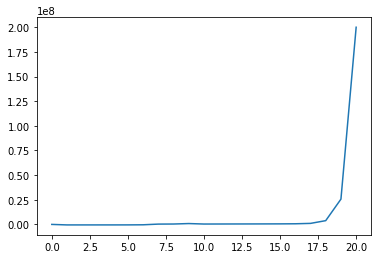

In [ ]:
#Annual GPV Reserve Formula
def GPV_RESERVE_ANNUALLY():
    #Assign Mortality, Disability, and Alive Probability Table
    tmi = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TMI.xlsx")
    tmim = tmi["Laki-Laki"]
    tmif = tmi["Perempuan"]

    tci = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TCI.xlsx")
    tcim = tci["Laki-a"]
    tcif = tci["Perempuan"]

    th = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TH.xlsx")
    thm = th["Laki-Laki"]
    thf = th["Perempuan"]
    
    #Input Data
    age = int(input("Insured's Age: "))
    gender = str(input("Insured's Gender (m or f): "))
    protection_term = int(input("Insured's Protection Term: "))
    payment_term = int(input("Insured's Payment Term: "))
    loyalty_term = int(input("Insured's Loyalty Bonus: "))
    interest = float(input("Interest: "))
    benefit = int(input("Insured's Benefit: "))
    if gender=="m":
        tht = thm
        tmd = tmim
        tc = tcim
    elif gender=="f":
        tht = thf
        tmd = tmif
        tc = tcif
    
    #Define Function
    "Probability to keep alive"
    def tpx(age,term):
        if term==0:
            return 1
        elif term>0:
            z=1
            for w in np.arange(term):
                z = z*tht[(age+w)]
            return z

    "Discount Factor"    
    def v(interest,term):
        v=(1+interest)**(-term)
        return v

    "Annuity Due"
    def adue(age,payment_term,interest):
        a=0
        for w in np.arange(payment_term):
            a += v(interest,w)*tpx(age,w)
        return a
    
    "Net Single Premium of Death Benefit"
    def NSPD(age,protection_term,interest):
        NSPD = 0
        for w in np.arange(protection_term):
            NSPD += v(interest,w+1)*tpx(age,w)*tmd[age+w]
        t = (NSPD)*(interest/np.log(1+interest))
        return t

    "Net Single Premium of Disability Benefit"
    def NSPC(age,protection_term,interest):
        NSPC = 0
        for w in np.arange(protection_term):
            NSPC += v(interest,w+1)*tpx(age,w)*tc[age+w]
        t = (NSPC)*(interest/np.log(1+interest))
        return t
    
    "Gross Premium Function"
    def GP(benefit,age,protection_term,payment_term,interest):
        Claim_Benefit = benefit*(NSPD(age,protection_term,interest)+NSPC(age,protection_term,interest)+0.2*v(interest,protection_term)*tpx(age,protection_term))
        Pembilang = Claim_Benefit+360000*adue(age,payment_term,interest)
        Penyebut = adue(age,payment_term,interest)-0.5*(1+v(interest,loyalty_term)*tpx(age,loyalty_term))
        ppp = Pembilang/Penyebut
        return ppp
    
    #GPV Reserve
    list_gpv=[]
    list_premium=[]
    list_death=[]
    list_disable=[]
    list_endow=[]
    list_admin=[]
    list_policy=[]
    list_loyalty=[]
    
    gross_premium = GP(benefit,age,protection_term,payment_term,interest)
    for i in np.arange(0,protection_term+1):
        if i==0:
            policy_fee = 0.5*gross_premium
        else:
            policy_fee = 0
        
        if i<=payment_term-1:
            admin_fees = 360000*adue(age+i,payment_term-i,interest)
            income = gross_premium*adue(age+i,payment_term-i,interest)
        else:
            admin_fees = 0
            income = 0
            
        if i<=loyalty_term:
            loyalty_bonus = 0.5*gross_premium*tpx(age+i,loyalty_term-i)*v(interest,loyalty_term-i)
        else:
            loyalty_bonus = 0
            
        if i<=protection_term-1:
            disable_benefit = benefit*NSPC(age+i,protection_term-i,interest)
            death_benefit = benefit*NSPD(age+i,protection_term-i,interest)
        else:
            disable_benefit = 0
            death_benefit = 0
            
        endowment = 0.2*benefit*v(interest, protection_term-i)*tpx(age+i,protection_term-i)
        "Append elements to list"
        list_premium.append(round(income,2))
        list_death.append(round(death_benefit,2))
        list_disable.append(round(disable_benefit,2))
        list_endow.append(round(endowment,2))
        list_admin.append(round(admin_fees,2))
        list_policy.append(round(policy_fee,2))
        list_loyalty.append(round(loyalty_bonus,2))
        list_gpv.append(round(admin_fees+loyalty_bonus+endowment+death_benefit+disable_benefit+policy_fee-income,2))

    #Plot all Components :D
    figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(15, 45))
    ax1.plot(list_premium)
    ax1.set_title("Plot Gross Premium")
    ax1.ticklabel_format(style='plain')

    ax2.plot(list_death)
    ax2.set_title("Plot Death Benefit")
    ax2.ticklabel_format(style='plain')

    ax3.plot(list_disable)
    ax3.set_title("Plot Disability Benefit")
    ax3.ticklabel_format(style='plain')

    ax4.plot(list_endow)
    ax4.set_title("Plot Endowment Benefit")
    ax4.ticklabel_format(style='plain')

    ax5.plot(list_admin)
    ax5.set_title("Plot Administration Fees")
    ax5.ticklabel_format(style='plain')  

    ax6.plot(list_policy)
    ax6.set_title("Plot Policy Fee")
    ax6.ticklabel_format(style='plain')

    ax7.plot(list_loyalty)
    ax7.set_title("Plot Loyalty Bonus")
    ax7.ticklabel_format(style='plain')

    ax8.plot(list_gpv)
    ax8.set_title("Plot GPV Reserves")
    ax8.ticklabel_format(style='plain')

    #Output     
    print("Gross Premium: ", gross_premium)
    result = pd.DataFrame({'Income': list_premium, 'Death': list_death, 'Disability': list_disable, 'Endowment': list_endow, 'Admin Fees': list_admin, 'Policy Fee':list_policy, 'Loyalty Bonus': list_loyalty, 'GPV': list_gpv})
    return result

In [ ]:
GPV_RESERVE_ANNUALLY()

In [ ]:
def GPV_RESERVE_MONTHLY():
    #Assign Mortality, Disability, and Alive Probability Table
    tmi = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TMI Monthly.xlsx")
    tmim = tmi["Laki-Laki"]
    tmif = tmi["Perempuan"]

    tci = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TCI Monthly.xlsx")
    tcim = tci["Laki-Laki"]
    tcif = tci["Perempuan"]

    th = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Materi Magang/TH Monthly.xlsx")
    thm = th["Laki-Laki"]
    thf = th["Perempuan"]
    
    #Input Data
    age = int(input("Insured's Age: "))
    gender = str(input("Insured's Gender (m or f): "))
    protection_term = int(input("Insured's Protection Term: "))
    payment_term = int(input("Insured's Payment Term: "))
    loyalty_term = int(input("Insured's Loyalty Bonus: "))
    interest = float(input("Interest: "))
    benefit = int(input("Insured's Benefit: "))
    if gender=="m":
        tht = thm
        tmd = tmim
        tc = tcim
    elif gender=="f":
        tht = thf
        tmd = tmif
        tc = tcif
        
    #Monthly Modification
    interest = ((1+interest)**(1/12)-1)
    age = age*12
    protection_term = protection_term*12
    payment_term = payment_term*12
    loyalty_term = loyalty_term*12
    
    #Define Function
    "Probability to keep alive"
    def tpx(age,term):
        if term==0:
            return 1
        elif term>0:
            z=1
            for w in np.arange(term):
                z = z*tht[(age+w)]
            return z

    "Discount Factor"    
    def v(interest,term):
        v=(1+interest)**(-term)
        return v

    "Annuity Due"
    def adue(age,payment_term,interest):
        a=0
        for w in np.arange(payment_term):
            a += v(interest,w)*tpx(age,w)
        return a
    
    "Net Single Premium of Death Benefit"
    def NSPD(age,protection_term,interest):
        NSPD = 0
        for w in np.arange(protection_term):
            NSPD += v(interest,w+1)*tpx(age,w)*tmd[age+w]
        t = (NSPD)*(interest/np.log(1+interest))
        return t

    "Net Single Premium of Disability Benefit"
    def NSPC(age,protection_term,interest):
        NSPC = 0
        for w in np.arange(protection_term):
            NSPC += v(interest,w+1)*tpx(age,w)*tc[age+w]
        t = (NSPC)*(interest/np.log(1+interest))
        return t
    
    "Gross Premium Function"
    def GP(benefit,age,protection_term,payment_term,interest):
        Claim_Benefit = benefit*(NSPD(age,protection_term,interest)+NSPC(age,protection_term,interest)+0.2*v(interest,protection_term)*tpx(age,protection_term)+0.01*v(interest,loyalty_term)*tpx(age,loyalty_term))
        Pembilang = Claim_Benefit+30000*adue(age,payment_term,interest)
        Penyebut = adue(age,payment_term,interest)-0.5*adue(age,12,interest)
        ppp = Pembilang/Penyebut
        return ppp
    
    #GPV Reserve Calculation
    list_gpv=[]
    list_premium=[]
    list_death=[]
    list_disable=[]
    list_endow=[]
    list_admin=[]
    list_policy=[]
    list_loyalty=[]
    
    gross_premium = GP(benefit,age,protection_term,payment_term,interest)
    for i in np.arange(0,protection_term+1):
        if i<=11:
            policy_fee = 0.5*gross_premium*adue(age+i,12-i,interest)
        else:
            policy_fee = 0
        
        if i<=payment_term-1:
            admin_fees = 30000*adue(age+i,payment_term-i,interest)
            income = gross_premium*adue(age+i,payment_term-i,interest)
        else:
            admin_fees = 0
            income = 0
            
        if i<=loyalty_term:
            loyalty_bonus = 0.01*benefit*tpx(age+i,loyalty_term-i)*v(interest,loyalty_term-i)
        else:
            loyalty_bonus = 0
            
        if i<=protection_term-1:
            disable_benefit = benefit*NSPC(age+i,protection_term-i,interest)
            death_benefit = benefit*NSPD(age+i,protection_term-i,interest)
        else:
            disable_benefit = 0
            death_benefit = 0
            
        endowment = 0.2*benefit*v(interest, protection_term-i)*tpx(age+i,protection_term-i)
        "Append elements to list"
        list_premium.append(round(income,2))
        list_death.append(round(death_benefit,2))
        list_disable.append(round(disable_benefit,2))
        list_endow.append(round(endowment,2))
        list_admin.append(round(admin_fees,2))
        list_policy.append(round(policy_fee,2))
        list_loyalty.append(round(loyalty_bonus,2))
        list_gpv.append(round(admin_fees+loyalty_bonus+endowment+death_benefit+disable_benefit+policy_fee-income,2))

    #Plot all Components :D
    figure, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(15, 45))
    ax1.plot(list_premium)
    ax1.set_title("Plot Gross Premium")
    ax1.ticklabel_format(style='plain')

    ax2.plot(list_death)
    ax2.set_title("Plot Death Benefit")
    ax2.ticklabel_format(style='plain')

    ax3.plot(list_disable)
    ax3.set_title("Plot Disability Benefit")
    ax3.ticklabel_format(style='plain')

    ax4.plot(list_endow)
    ax4.set_title("Plot Endowment Benefit")
    ax4.ticklabel_format(style='plain')

    ax5.plot(list_admin)
    ax5.set_title("Plot Administration Fees")
    ax5.ticklabel_format(style='plain')  

    ax6.plot(list_policy)
    ax6.set_title("Plot Policy Fee")
    ax6.ticklabel_format(style='plain')

    ax7.plot(list_loyalty)
    ax7.set_title("Plot Loyalty Bonus")
    ax7.ticklabel_format(style='plain')

    ax8.plot(list_gpv)
    ax8.set_title("Plot GPV Reserves")
    ax8.ticklabel_format(style='plain')

    #Output     
    print("Gross Premium: ", gross_premium)
    result = pd.DataFrame({'Income': list_premium, 'Death': list_death, 'Disability': list_disable, 'Endowment': list_endow, 'Admin Fees': list_admin, 'Policy Fee':list_policy, 'Loyalty Bonus': list_loyalty, 'GPV': list_gpv})
    return result

In [ ]:
GPV_RESERVE_MONTHLY()

The example above is an illustration for insurance product that has:
* Insured age = 20
* Insured gender's = male
* Insured term of protection = 20 years
* Term of premium payment = 7 years
* Interest rate = 7%
* Benefit if one of the decrements happen = Rp1.000.000.000
* Endowment benefit = 20% decrement benefit